## ***Football Prediction (MchezoPesa-Football)***

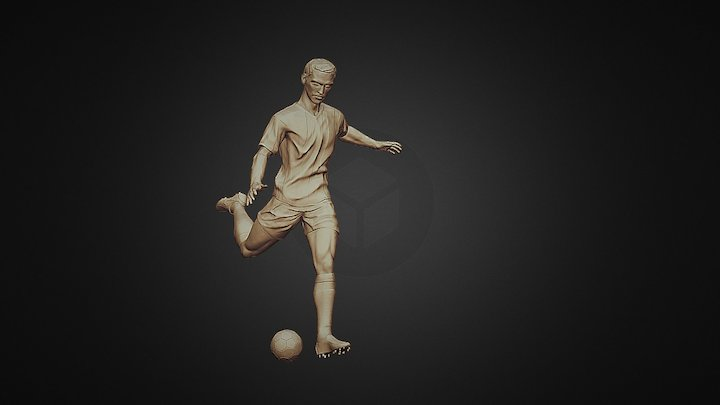

## ***Defining the Question***

## ***a) Specifying the Question***

I have been recruited as a football analyst in a company called Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## ***b) Defining the Metric for Success***

***Metric 1***

Predict how many goals the home team scores.

Predict how many goals the away team scores.

***Metric 2***

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## ***c) Understanding the context***

The rankings are used to rank the progression and current ability of the football teams , and claims that they create "a reliable measure for comparing A-teams". They are used as part of the calculation for prediction of future scores

## ***d) Recording the Experimental Design***

Reading and Checking the Data

1.   External Data Source Validation
1.   Tidying the Dataset
1.   Feature Engineering
2.   Exploratory Analysis
2.   Implementing the Solution
2.   Challenging the solution
1.   Follow-up questions












## ***e) Data Relevance***

There are 2 datasets - FIFA ranking and results

***FIFA Ranking Columns***

Rank Country Abbreviation

Total Points

Previous Points

Rank Change

Average Previous Years Points

Average Previous Years Points Weighted (50%)

Average 2 Years Ago Points

Average 2 Years Ago Points Weighted (30%)

Average 3 Years Ago Points

Average 3 Years Ago Points Weighted (20%)

Confederation

***Results dataset column***

Date - date of the match

Home_team - the name of the home team

Away_team - the name of the away team

Home_score - full-time home team score including extra time, not including penalty-shootouts

Away_score - full-time away team score including extra time, not including penalty-shootouts

Tournament - the name of the tournament

City - the name of the city where the match was played

Country - the name of the country where the match was played

Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

## ***Importing Libraries***

In [104]:
# Importing libraries 

# Import pandas
import pandas as pd    

# Import numpy
import numpy as np   

# Seaborn for visuals
import seaborn as sns  

 # Matplot for plotting
import matplotlib.pyplot as plt  

# Convert date formats
import datetime as dt   
                        
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

## ***Loading datasets***

In [108]:
# Loading datasets

result = pd.read_csv('results.csv')
ranking = pd.read_csv('fifa_ranking.csv')

In [109]:
# Check The number of records in datasets

print('Fifa ranking dataset has ',ranking.shape[0],'records and ', ranking.shape[1], 'columns' )
print('Result dataset has ', result.shape[0],'records and ', result.shape[1], 'columns')

Fifa ranking dataset has  57793 records and  16 columns
Result dataset has  40839 records and  9 columns


## ***Previewing the datasets***

In [110]:
# Previeing the top part of the datasets 

display("FIFA Ranking of teams")
display(ranking.head(3))
display("FIFA Results of teams")
display(result.head(3))

'FIFA Ranking of teams'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


'FIFA Results of teams'

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [111]:
# Previewing the bottom part of the datasets 

display("FIFA Ranking of teams")
display(ranking.tail(3))
display("FIFA Results of teams")
display(result.tail(3))

'FIFA Ranking of teams'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


'FIFA Results of teams'

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


## ***Check information of datasets***

In [112]:
# Check  information on datatypes of datasets 

display("FIFA Results")
display(result.info())
display("FIFA Ranking")
display(ranking.info())

'FIFA Results'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


None

'FIFA Ranking'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

None

## ***Checking Column in datasets***

In [113]:
# Checking the columns in datasets

display("FIFA Ranking of teams")
display(ranking.columns)
display("FIFA Results of teams")
display(result.columns)  

'FIFA Ranking of teams'

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

'FIFA Results of teams'

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [114]:
# Rename rank_date to date for easier merging 

rankings = ranking.rename(columns={"rank_date": "date"})
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [115]:
# Set The date_time as the index

import datetime 
from datetime import  datetime

rankings.date.sort_values(ascending=True)
rankings.set_index(pd.DatetimeIndex(rankings['date']), drop=True, inplace = True)
result.date.sort_values(ascending=True)
result.set_index(pd.DatetimeIndex(result['date']), drop=True, inplace = True)
print(result.head())
print(result.tail())
print(rankings.head())
print(rankings.tail())

                  date home_team away_team  home_score  away_score tournament  \
date                                                                            
1872-11-30  1872-11-30  Scotland   England           0           0   Friendly   
1873-03-08  1873-03-08   England  Scotland           4           2   Friendly   
1874-03-07  1874-03-07  Scotland   England           2           1   Friendly   
1875-03-06  1875-03-06   England  Scotland           2           2   Friendly   
1876-03-04  1876-03-04  Scotland   England           3           0   Friendly   

               city   country  neutral  
date                                    
1872-11-30  Glasgow  Scotland    False  
1873-03-08   London   England    False  
1874-03-07  Glasgow  Scotland    False  
1875-03-06   London   England    False  
1876-03-04  Glasgow  Scotland    False  
                  date         home_team        away_team  home_score  \
date                                                                    

## ***Merging the dataset***

In [116]:
# Merge two Dataframes on index of both the dataframes

mergeddata = rankings.merge(result, left_index=True, right_index=True)

***Previewing the bottom of the datasets***

In [117]:
# Previewing the bottom part of the datasets 

display("FIFA Ranking and Results of teams")
display(mergeddata.head(3))
display(mergeddata.tail(3))

'FIFA Ranking and Results of teams'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,date_x,date_y,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,,,,,,,,,,,,,,
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,...,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,date_x,date_y,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,,,,,,,,,,,,,,
2018-06-07,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,2018-06-07,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True
2018-06-07,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,2018-06-07,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True
2018-06-07,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,...,2018-06-07,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True


In [118]:
# Check The number of records in merged dataset
# Checking information in merged dataset
# Checking columns in merged dataset

print('Merged dataset has ',mergeddata.shape[0],'records and ', mergeddata.shape[1], 'rows' )
print(mergeddata.info())
print(mergeddata.columns)

Merged dataset has  212831 records and  25 rows
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212831 entries, 1993-08-08 to 2018-06-07
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     212831 non-null  int64  
 1   country_full             212831 non-null  object 
 2   country_abrv             212831 non-null  object 
 3   total_points             212831 non-null  float64
 4   previous_points          212831 non-null  int64  
 5   rank_change              212831 non-null  int64  
 6   cur_year_avg             212831 non-null  float64
 7   cur_year_avg_weighted    212831 non-null  float64
 8   last_year_avg            212831 non-null  float64
 9   last_year_avg_weighted   212831 non-null  float64
 10  two_year_ago_avg         212831 non-null  float64
 11  two_year_ago_weighted    212831 non-null  float64
 12  three_year_ago_avg       212831 non-null  float64


## ***Dropping useless columns***

In [119]:
# Dropping irrelevant columns 

to_drop = [ 'country_abrv','rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date_x', 'date_y']
mergeddata.drop(to_drop, axis=1,inplace=True)

## ***Selecting Home and Away teams***

In [120]:
# Selecting the ranking details of the home teams only

home_teams = mergeddata[mergeddata.home_team == mergeddata.country_full]

# Previewing the first five rows of the home_teams

home_teams.shape

(957, 12)

In [121]:
# Selecting the ranking details of the away teams only

away_teams = mergeddata[mergeddata.away_team == mergeddata.country_full]

# Previewing the first five rows of the away_teams

away_teams.shape

(933, 12)

## ***Merging Home and Away team***

In [122]:
# Merging the home_teams dataframe to the away_teams dataframe
# The two dataframes have been merged on date, home_team and away_team columns

final_df = pd.merge(home_teams, away_teams, how = 'left' , left_on =['date', 'home_team', 'away_team'],\
                    right_on = ['date', 'home_team', 'away_team'])

In [123]:
final_df

,rank_x,country_full_x,total_points_x,previous_points_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,...,rank_y,country_full_y,total_points_y,previous_points_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y
date,,,,,,,,,,,,,,,,,,,,,
1993-08-08,8,Brazil,0.00,55,Brazil,Mexico,1,1,Friendly,Maceió,...,14.0,Mexico,0.00,42.0,1.0,1.0,Friendly,Maceió,Brazil,False
1993-08-08,35,Ecuador,0.00,23,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,...,94.0,Venezuela,0.00,4.0,5.0,0.0,FIFA World Cup qualification,Quito,Ecuador,False
1993-08-08,50,Zimbabwe,0.00,27,Zimbabwe,Eswatini,2,0,Friendly,Harare,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-08,59,Bolivia,0.00,13,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,...,22.0,Uruguay,0.00,47.0,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False
1993-08-08,65,Guinea,0.00,23,Guinea,Sierra Leone,1,0,Friendly,Conakry,...,86.0,Sierra Leone,0.00,16.0,1.0,0.0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-07,4,Portugal,1273.69,1306,Portugal,Algeria,3,0,Friendly,Lisbon,...,66.0,Algeria,473.83,499.0,3.0,0.0,Friendly,Lisbon,Portugal,False
2018-06-07,12,England,1050.84,1040,England,Costa Rica,2,0,Friendly,Leeds,...,23.0,Costa Rica,884.04,858.0,2.0,0.0,Friendly,Leeds,England,False
2018-06-07,14,Uruguay,1018.41,976,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,...,95.0,Uzbekistan,353.91,381.0,3.0,0.0,Friendly,Montevideo,Uruguay,False


In [124]:
# Dropping irrelevant columns 

to_drop = ['country_full_x','country_full_y','home_score_y',
       'away_score_y', 'tournament_y', 'city_y', 'country_y', 'neutral_y' ]
final_df.drop(to_drop, axis=1,inplace=True)

In [125]:
final_df.head()

,rank_x,total_points_x,previous_points_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,rank_y,total_points_y,previous_points_y
date,,,,,,,,,,,,,,
1993-08-08,8,0.0,55,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,14.0,0.0,42.0
1993-08-08,35,0.0,23,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94.0,0.0,4.0
1993-08-08,50,0.0,27,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False,NaN,NaN,NaN
1993-08-08,59,0.0,13,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22.0,0.0,47.0
1993-08-08,65,0.0,23,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86.0,0.0,16.0


## ***Rearrange and Renaming columns***

In [126]:
# Rearrange and Renaming columns

df2=final_df.reindex(columns= ['home_team', 'away_team', 'home_score_x', 'away_score_x','rank_x', 'rank_y','total_points_x','total_points_y' ,'previous_points_x', 'previous_points_y',
    'neutral_x','tournament_x', 'city_x', 'country_x'])

# Changing cols with rename() 

new_data = df2.rename(columns = {"home_score_x": "home_score", 
                                  "away_score_x":"away_score", 
                                  "rank_x": "home rank",
                                 "rank_y": "away rank",
                                 "tournament_x" : "tournament_type",
                                 'total_points_x' : "home_total_points",
                                 'total_points_y' : "away_total_points" ,
                                 'previous_points_x': "home_previous_points",
                                 'previous_points_y' : "away_previous_points",
                                 "neutral_x" : "neutral",
                                 "city_x" : "city",
                                 "country_x": "country"}) 
  
new_data.head()

,home_team,away_team,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country
date,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,1,1,8,14.0,0.0,0.0,55,42.0,False,Friendly,Maceió,Brazil
1993-08-08,Ecuador,Venezuela,5,0,35,94.0,0.0,0.0,23,4.0,False,FIFA World Cup qualification,Quito,Ecuador
1993-08-08,Zimbabwe,Eswatini,2,0,50,NaN,0.0,NaN,27,NaN,False,Friendly,Harare,Zimbabwe
1993-08-08,Bolivia,Uruguay,3,1,59,22.0,0.0,0.0,13,47.0,False,FIFA World Cup qualification,La Paz,Bolivia
1993-08-08,Guinea,Sierra Leone,1,0,65,86.0,0.0,0.0,23,16.0,False,Friendly,Conakry,Guinea


In [127]:
# Creating a year column from the datetime index

new_data['date'] =new_data.index
new_data['year']= new_data.date.dt.year
to_drop = ['date']
new_data.drop(to_drop, axis=1,inplace=True)
new_data.head()

,home_team,away_team,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country,year
date,,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,1,1,8,14.0,0.0,0.0,55,42.0,False,Friendly,Maceió,Brazil,1993
1993-08-08,Ecuador,Venezuela,5,0,35,94.0,0.0,0.0,23,4.0,False,FIFA World Cup qualification,Quito,Ecuador,1993
1993-08-08,Zimbabwe,Eswatini,2,0,50,NaN,0.0,NaN,27,NaN,False,Friendly,Harare,Zimbabwe,1993
1993-08-08,Bolivia,Uruguay,3,1,59,22.0,0.0,0.0,13,47.0,False,FIFA World Cup qualification,La Paz,Bolivia,1993
1993-08-08,Guinea,Sierra Leone,1,0,65,86.0,0.0,0.0,23,16.0,False,Friendly,Conakry,Guinea,1993


## ***External Data Source Validation***

In [128]:
print(new_data.mean())
print(new_data.mode())
print(new_data.median())
print(new_data.var())
print(new_data.std())

home_score                 1.665622
away_score                 1.004180
home rank                 66.561129
away rank                 69.918485
home_total_points         37.524222
away_total_points         30.606923
home_previous_points     459.808777
away_previous_points     448.623421
neutral                    0.165099
year                    2004.753396
dtype: float64
  home_team  away_team  home_score  away_score  home rank  away rank  \
0    Mexico  Argentina         1.0         0.0       33.0       20.0   
1       NaN    Uruguay         NaN         NaN        NaN       30.0   
2       NaN        NaN         NaN         NaN        NaN       36.0   

   home_total_points  away_total_points  home_previous_points  \
0                0.0                0.0                  36.0   
1                NaN                NaN                  55.0   
2                NaN                NaN                   NaN   

   away_previous_points neutral tournament_type  city        country    yea

## ***Tidying the dataset***

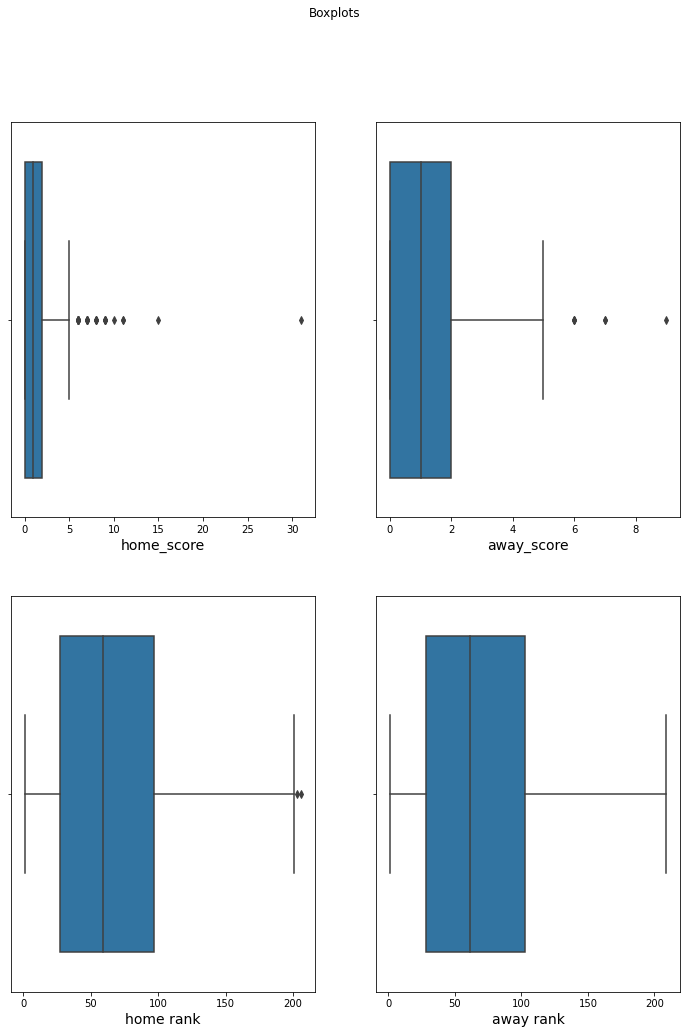

In [129]:
# Detecting outliers

# Checking for Outliers

fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2,2, figsize=(12, 16))
fig.suptitle('Boxplots')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)

sns.boxplot(new_data['home_score'], ax=ax1)
sns.boxplot(new_data['away_score'], ax=ax2)
sns.boxplot(new_data['home rank'], ax=ax3)
sns.boxplot(new_data['away rank'], ax=ax4)

There seems to be minimal outliers

## ***Checking Anomalies***

***Missing values***

In [130]:
# Checking for missing values 

new_data.isnull().sum()

home_team                0
away_team                0
home_score               0
away_score               0
home rank                0
away rank               86
home_total_points        0
away_total_points       86
home_previous_points     0
away_previous_points    86
neutral                  0
tournament_type          0
city                     0
country                  0
year                     0
dtype: int64

In [131]:
# Dealing with missing data 

new_data = new_data.dropna(axis=0, how='any')
new_data.isnull().sum()

home_team               0
away_team               0
home_score              0
away_score              0
home rank               0
away rank               0
home_total_points       0
away_total_points       0
home_previous_points    0
away_previous_points    0
neutral                 0
tournament_type         0
city                    0
country                 0
year                    0
dtype: int64

## ***Feature Engineering***

In [134]:
# Creating a scores- to show {home_score - away_score} and status column using bins and labels  to show if it is a win,loss and draw from score column 

new_data['score'] = new_data['home_score']- new_data['away_score']
print(new_data.score.unique())
status =[-8, -1, 0,32]
labels= ['L', 'D', 'W']
new_data['status'] = pd.cut(new_data.score, bins=status , labels=labels,  include_lowest=True)
print(new_data.status.unique())
new_data.head()

[ 0  5  2  1 -2 -1  6 -4  3 -3  4  9 -5 31  8 11 -8  7 -6 -7 10 15]
['D', 'W', 'L']
Categories (3, object): ['L' < 'D' < 'W']


,home_team,away_team,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country,year,score,status
date,,,,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,1,1,8,14.0,0.0,0.0,55,42.0,False,Friendly,Maceió,Brazil,1993,0,D
1993-08-08,Ecuador,Venezuela,5,0,35,94.0,0.0,0.0,23,4.0,False,FIFA World Cup qualification,Quito,Ecuador,1993,5,W
1993-08-08,Bolivia,Uruguay,3,1,59,22.0,0.0,0.0,13,47.0,False,FIFA World Cup qualification,La Paz,Bolivia,1993,2,W
1993-08-08,Guinea,Sierra Leone,1,0,65,86.0,0.0,0.0,23,16.0,False,Friendly,Conakry,Guinea,1993,1,W
1993-08-08,Paraguay,Argentina,1,3,67,5.0,0.0,0.0,22,51.0,False,FIFA World Cup qualification,Asunción,Paraguay,1993,-2,L


## ***Check unique value***

In [135]:
new_data.tournament_type.unique()

array(['Friendly', 'FIFA World Cup qualification', 'Merdeka Tournament',
       'South Pacific Games', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'Copa América',
       'UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Korea Cup', 'Gold Cup', 'AFC Asian Cup qualification', 'USA Cup',
       'Millennium Cup', "King's Cup", 'CFU Caribbean Cup', 'Gulf Cup',
       'Cyprus International Tournament',
       'Malta International Tournament', 'AFF Championship', 'UAFA Cup',
       'SAFF Cup', 'Gold Cup qualification', "Prime Minister's Cup",
       'Confederations Cup', 'AFC Asian Cup', 'Nehru Cup', 'COSAFA Cup',
       'CECAFA Cup', 'EAFF Championship',
       'AFC Challenge Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'Oceania Nations Cup', 'African Nations Championship',
       'Windward Islands Tournament', 'Intercontinental Cup'],
      dtype=object)

Try and get the friendly, continental and international matches

In [136]:
new_data.tournament_type = new_data.tournament_type.replace({'FIFA World Cup qualification': 'International', 'Merdeka Tournament': 'Friendly', 'South Pacific Games': 'Continental', 'African Cup of Nations': 'Continental',
                 'CFU Caribbean Cup qualification': 'Continental', 'Copa América': 'Friendly', 'South Pacific Games': 'Continental', 'UEFA Euro qualification': 'Continental',
                 'UNCAF Cup': 'International', 'United Arab Emirates Friendship Tournament': 'Friendly', 'South Pacific Games': 'Continental', 'AFC Asian Cup qualification': 'Continental',
                  'Gold Cup': 'International', 'Korea Cup': 'Friendly', 'AFF Championship' : 'Continental', 'AFC Asian Cup qualification': 'Continental',
                 'Millennium Cup': 'International', 'USA Cup': 'Friendly', 'South Pacific Games': 'Continental', 'Gulf Cup': 'Continental',
                 "King's Cup" : 'International', 'CFU Caribbean Cup': 'Friendly', 'South Pacific Games': 'Continental', 'UAFA Cup': 'Continental',
                 'Intercontinental Cup':  'International',   'Cyprus International Tournament':   'International' ,'Malta International Tournament':  'International' ,
                 'SAFF Cup': 'Friendly', 'Gold Cup qualification' : 'International', "Prime Minister's Cup": 'Friendly',
                 'Confederations Cup': 'Continental', 'AFC Asian Cup' : 'Continental', 'Nehru Cup' : 'Friendly', 'COSAFA Cup' : 'Friendly',
                 'CECAFA Cup' : 'Friendly', 'EAFF Championship' : 'Friendly',
              'AFC Challenge Cup qualification' : 'Continental',
            'African Cup of Nations qualification' : 'Continental', 'Copa del Pacífico' : 'Friendly',
           'Oceania Nations Cup' : 'Continental', 'African Nations Championship' : 'Continental',
           'Windward Islands Tournament' : 'Friendly', 'Intercontinental Cup' : 'International'})
new_data.tournament_type.unique()

array(['Friendly', 'International', 'Continental'], dtype=object)


## ***Exploratory Analysis***

In [137]:
# Statistical analysis of dataset

new_data.describe()

,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,year,score
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,69.918485,38.543123,30.606923,464.027555,448.623421,2004.789897,0.628014
std,1.905960,1.154691,47.557993,50.497652,160.974942,134.737527,301.538498,315.851144,5.405888,2.355594
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1993.000000,-8.000000
25%,0.000000,0.000000,27.000000,28.000000,0.000000,0.000000,231.000000,172.500000,2000.000000,-1.000000
50%,1.000000,1.000000,58.000000,61.000000,0.000000,0.000000,485.000000,452.000000,2005.000000,0.000000
75%,2.000000,2.000000,95.000000,102.500000,0.000000,0.000000,652.000000,629.500000,2010.000000,2.000000
max,31.000000,9.000000,206.000000,209.000000,1273.690000,1181.430000,1683.000000,1883.000000,2018.000000,31.000000


***Goal per Year***

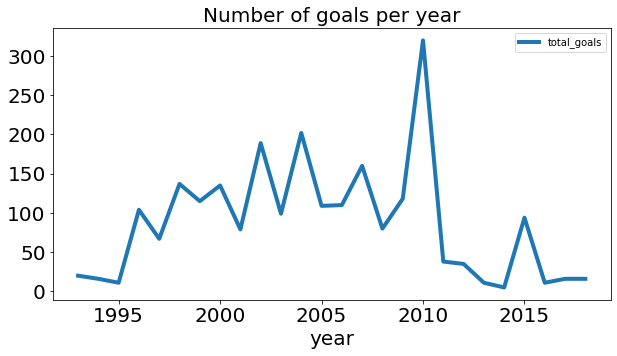

In [138]:
# Getting the number of goals per year

goals = new_data.copy()
goals['total_goals'] = goals.home_score + goals.away_score

GB = goals.groupby([goals.year]).sum()
GB.total_goals.plot(figsize=(10,5), linewidth=4, fontsize=20)
plt.title('Number of goals per year', fontsize=20)
plt.xlabel('year', fontsize=20);
plt.legend()

2010 seem to have recorded the highest number of goals

***Top and Bottom countries***

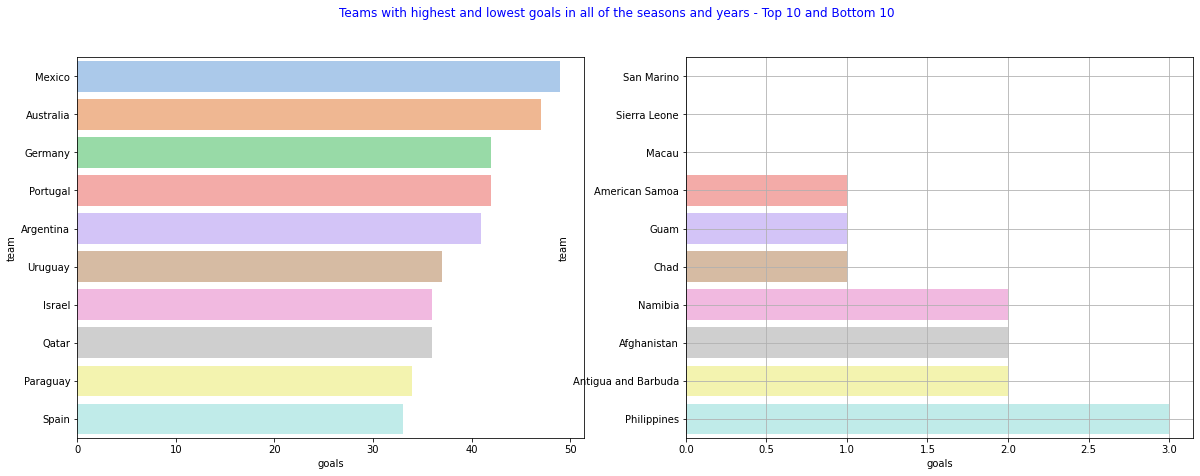

In [139]:
# Top 10 and Bottom 10 countries based on total goals scored over the years 

analysis = new_data.copy()
home_scores= pd.DataFrame(analysis.groupby(analysis.home_team)['home_score'].sum())
homes= home_scores.rename(columns= {"home_team" : "team"})
away_scores= pd.DataFrame(analysis.groupby(analysis.away_team)['away_score'].sum())
aways =away_scores.rename(columns= {"away_team" : "team"})

# Merge two Dataframes on index of both the dataframes

scores =homes.merge(aways,  left_index=True, right_index=True)
scores['team'] = scores.index
scores['goals'] = scores.home_score + scores.away_score
score =scores.sort_values(by='goals', ascending=False)
score.head()

fig, ((ax1, ax2))= plt.subplots(1,2, figsize=(20, 7))  
sns.barplot("goals","team",data=score[:10],palette="pastel",linewidth=1, ax=ax1)
sns.barplot("goals","team",data=score[:-11:-1],palette="pastel",linewidth=1, ax=ax2)

fig.suptitle("Teams with highest and lowest goals in all of the seasons and years - Top 10 and Bottom 10",color='b')
plt.grid(True)
plt.show()

## ***Home and Away scores per year***

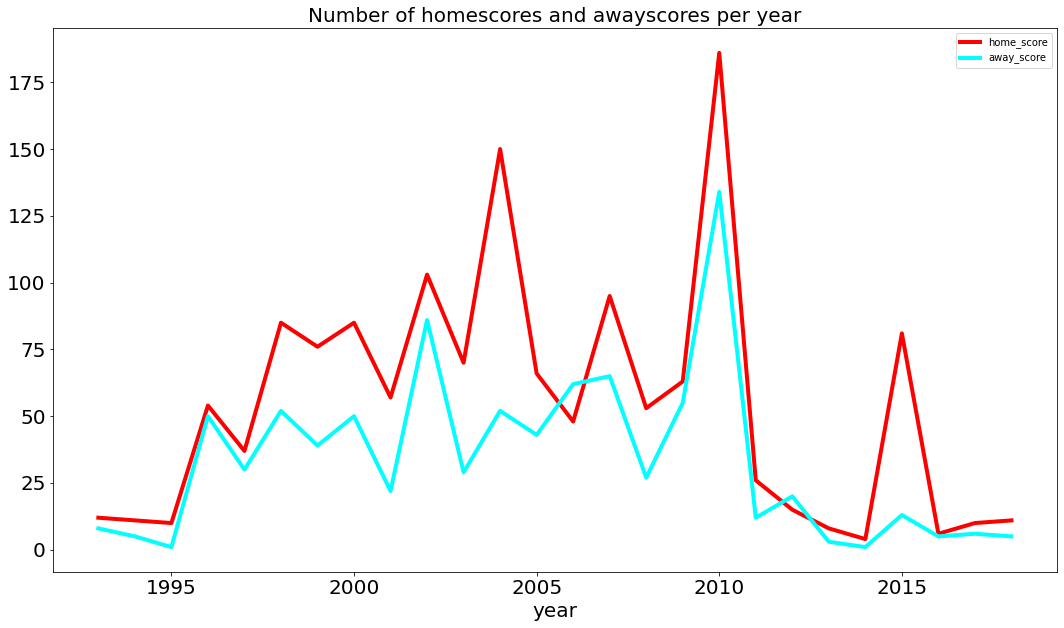

In [140]:
# Analysis of the homescore and away_scores over the years 

GB.home_score.plot(figsize=(18,10), linewidth=4, fontsize=20, color='red')
GB.away_score.plot(figsize=(18,10), linewidth=4, fontsize=20, color='cyan')
plt.title('Number of homescores and awayscores per year', fontsize=20)
plt.xlabel('year', fontsize=20);
plt.legend()

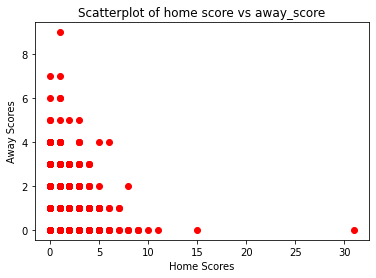

In [141]:
# Scatterplot of the homescore and away_colums columns

plt.scatter(x=new_data['home_score'], y=new_data['away_score'], c='red')
plt.title('Scatterplot of home score vs away_score')
plt.xlabel('Home Scores')
plt.ylabel('Away Scores')
plt.show()

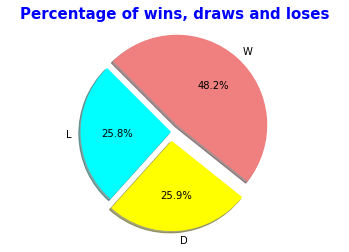

In [142]:
# The percentage of wins,draws and loses over the year

team_status = new_data[['home_score','status']]
new_df = new_data.groupby('status')['home_score'].count()
new_df =pd.DataFrame({'status':new_df.index, 'home_score':new_df.values})
new_df
homescore= new_df['home_score']
thestatus = new_df['status']
colors_list = ['cyan', 'yellow', 'lightcoral']
plt.title("Percentage of wins, draws and loses",
     color = 'blue', fontweight = 'bold', fontsize = '15')
plt.pie(homescore, labels=thestatus, autopct='%1.1f%%', shadow=True, explode = (0,0.1,0.1), startangle=135, colors=colors_list)
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

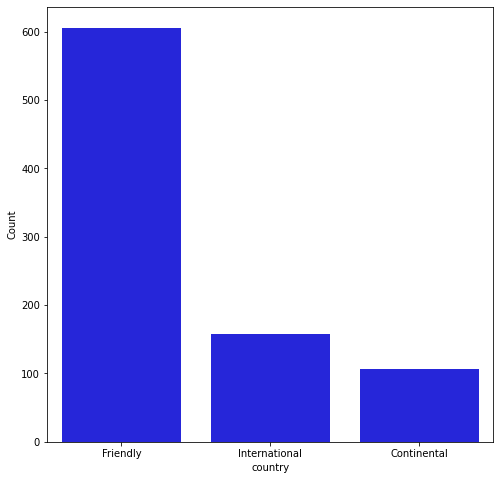

In [143]:
# Which tournament was recorded most

fig = plt.gcf()
fig.set_size_inches(8,8)
sns.countplot(new_data.tournament_type, color='blue',saturation=0.7)

plt.xlabel('country')
plt.ylabel('Count')

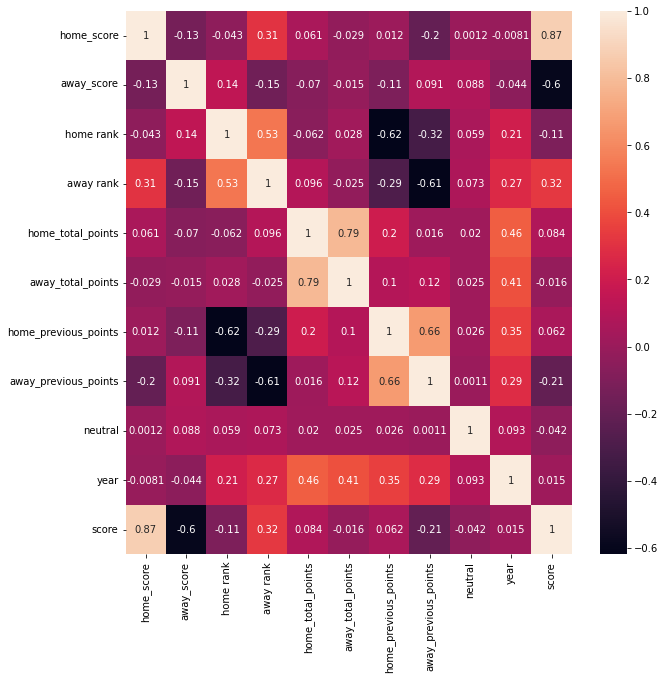

In [144]:
# Correlation of each variable 

correlation_mat = new_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_mat,annot=True )
plt.show()

## ***Implementing the solution***

In [145]:
# Detecting multi-colinearity 
# Remove the serial and admit chance columns, we want to focus on our independent variables only.

independent_only = new_data.iloc[:,2:6]

# Let's display the correlations between the variables

correlations = independent_only.corr()
correlations

,home_score,away_score,home rank,away rank
home_score,1.000000,-0.132413,-0.043381,0.309322
away_score,-0.132413,1.000000,0.143060,-0.151524
home rank,-0.043381,0.143060,1.000000,0.534618
away rank,0.309322,-0.151524,0.534618,1.000000


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [146]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home rank,away rank
home_score,1.186436,0.026235,0.338555,-0.544013
away_score,0.026235,1.103430,-0.338521,0.340060
home rank,0.338555,-0.338521,1.605364,-1.014273
away rank,-0.544013,0.340060,-1.014273,1.762051


Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. home_score has a score of 1.18, away_score has a score of 1.10, home_rank a score of 1.60 and away rank has a score of 1.76

There is none nearing 5 hence no multi-colinearity detected between the independent variables

## ***Polynomial Regression Analysis***

## ***Model 1***

Do a home_score prediction given rank of home team

***Checking for multicolinierity***

In [147]:
correlations=new_data.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,year,score
home_score,1.965600e+15,-1.190823e+15,1.517896,-4.130431,-0.256263,-0.646331,0.718266,-2.222004,-0.183970,2.876473,-2.429304e+15
away_score,-1.190823e+15,7.214387e+14,-1.044797,2.432230,0.064667,0.458487,-0.377381,1.227770,0.008902,-1.603903,1.471750e+15
home rank,1.695219e+00,-1.152225e+00,3.923687,-2.293147,0.325724,-0.140252,3.291413,-1.944522,-0.036470,-0.913949,-1.636618e+00
away rank,-4.344118e+00,2.561688e+00,-2.293147,4.095428,0.054165,0.325661,-2.013553,3.164993,-0.062488,-0.952874,4.548721e+00
home_total_points,-2.312677e-01,4.952385e-02,0.325724,0.054165,3.308654,-2.390141,-0.590747,0.945136,0.052314,-0.680383,1.770957e-01
away_total_points,-6.678751e-01,4.715393e-01,-0.140252,0.325661,-2.390141,3.002432,0.605703,-0.496636,-0.039063,-0.264731,8.559756e-01
home_previous_points,1.038552e+00,-5.714203e-01,3.291413,-2.013553,-0.590747,0.605703,5.037205,-3.291414,-0.091393,-0.950781,-1.172877e+00
away_previous_points,-2.629687e+00,1.474757e+00,-1.944522,3.164993,0.945136,-0.496636,-3.291414,4.757650,0.042999,-0.875126,3.063663e+00
neutral,-2.017466e-01,1.967115e-02,-0.036470,-0.062488,0.052314,-0.039063,-0.091393,0.042999,1.024342,-0.063703,2.583716e-01
year,2.897199e+00,-1.616459e+00,-0.913949,-0.952874,-0.680383,-0.264731,-0.950781,-0.875126,-0.063703,2.459038,-3.393984e+00


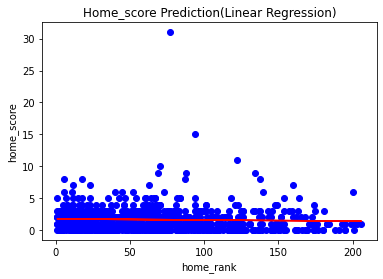

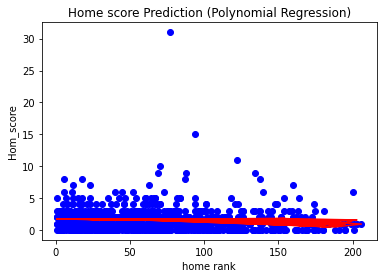

In [148]:
# X= Rank of home team 
# Y = Home_score 

X = new_data.iloc[:, 4].values
y = new_data.iloc[:, 2].values 
X = np.reshape(X, (-1,1))

# Split the dataset into train and test sets

X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)

reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results

plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home_score Prediction(Linear Regression)')
plt.xlabel('home_rank')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree = 15) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualize the Polynomial Regression results

plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score Prediction (Polynomial Regression)')
plt.xlabel('home rank')
plt.ylabel('Hom_score')
plt.show()
  
plt.show() 

Polynomial touches more values than linear hence might be more accurate in predicting. Also there is no overfitting in polynomial

In [150]:
# Display the intercept / bias

print(pol_reg.intercept_)

# Display the coefficient

print(pol_reg.coef_)

1.7039879269220535
[ 0.00000000e+00 -1.13707891e-25  1.49765660e-29 -2.39293421e-32
 -6.33867880e-35 -6.05166548e-33 -5.73336004e-31 -5.07278744e-29
 -4.07815879e-27 -2.83735775e-25 -1.54980128e-23 -5.12397372e-22
  1.17528101e-23 -1.00392001e-25  3.78598916e-28 -5.32004425e-31]


coefficients are the values that multiply the predictor values in a model In our case we haave 15v alues as our degrees were also 15

is the expected mean value of dependent variable when all dependent variables=0

In [151]:
# Dropping anything with a vif score above 5

new_data.drop(['home rank'],axis=1,inplace=True)

In [152]:
# Checking how vif score has been affected

correlations=new_data.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,year,score
home_score,1.965600e+15,-1.190823e+15,-3.178985,-0.289975,-0.647962,-0.599314,-1.353401,-0.169674,3.171827,-2.429304e+15
away_score,-1.190823e+15,7.214387e+14,1.782638,0.095485,0.455000,0.525882,0.639491,-0.000923,-1.812002,1.471750e+15
away rank,-3.164279e+00,1.773728e+00,2.755229,0.244530,0.243693,-0.089931,2.028542,-0.083802,-1.487019,3.358521e+00
home_total_points,-2.674315e-01,8.182705e-02,0.244530,3.281614,-2.378498,-0.863982,1.106560,0.055341,-0.604512,1.837271e-01
away_total_points,-6.668071e-01,4.664167e-01,0.243693,-2.378498,2.997418,0.723355,-0.566143,-0.040367,-0.297400,8.710454e-01
home_previous_points,-6.543167e-01,5.592045e-01,-0.089931,-0.863982,0.723355,2.276180,-1.660238,-0.060800,-0.184108,5.347236e-01
away_previous_points,-1.294734e+00,6.039492e-01,2.028542,1.106560,-0.566143,-1.660238,3.793973,0.024925,-1.328066,1.641018e+00
neutral,-1.696737e-01,-9.233984e-04,-0.083802,0.055341,-0.040367,-0.060800,0.024925,1.024004,-0.072198,2.229942e-01
year,3.171827e+00,-1.812002e+00,-1.487019,-0.604512,-0.297400,-0.184108,-1.328066,-0.072198,2.246151,-3.626597e+00
score,-2.429304e+15,1.471750e+15,3.376697,0.211589,0.847754,0.466745,1.713524,0.222994,-3.626597,3.002400e+15


# ***Predicting the Home Score***

In [153]:
new_data['tournament_type'] =lb.fit_transform(new_data['tournament_type'])
new_data['home_team'] =lb.fit_transform(new_data['home_team'])
new_data['away_team'] =lb.fit_transform(new_data['away_team'])

In [154]:
# Defining our dependent and independent variables

X = new_data[['away rank','tournament_type','home_score','home_team', 'away_score']].values
y = new_data['score'].values
print('the X array is: ',X)
print('the y array is: ',y)

the X array is:  [[ 14.   1.   1.  23.   1.]
 [ 94.   2.   5.  40.   0.]
 [ 22.   2.   3.  20.   1.]
 ...
 [ 95.   1.   3. 151.   0.]
 [ 47.   1.   2.  65.   2.]
 [120.   2.   1.  66.   2.]]
the y array is:  [ 0  5  2  1 -2 -1 -1  1  5 -1  1  6  1  2 -1  1 -4  0 -1  2 -1  2  2  1
  2 -1  2  0  5 -1  0  2  0  0  3  2  2 -1 -2 -2 -3  0  0  0 -2  1  1 -2
 -1 -1  3 -2  1 -3  1  2  5  3  2  1  1  2  1  2  1  0 -4 -2  0 -3 -1 -3
  3 -4  1  0 -1  0  4 -2  0 -1  1  3  0  2  1 -2  3  0  0  1  0 -2  1 -2
  3  0 -1  1  0  0  1  0  1 -3  1  4  3  1  1  4  0  1  0 -1  4  0  0  2
  0  2  2  2  0  0 -1  0  0 -1  1  2  9  1  2  2  0  2  1 -1  0  0  3  1
  4  0  0  1  0 -1 -1  2  1  0  2  0 -1  4  2 -2 -1  0  1 -1 -2 -1  3  0
  0  1 -1  1  1  2  1  2  2  2  3 -1  0 -1  0  6  2 -1  1  5  1  2 -2 -1
  0  0  3  0  0  0  2  2  0  1  0 -5  2  1 -1  0  1  1 -1  1  4 -2 -2  1
  0 -4  1  3 -2  1  1  0  0  5  3  2 -1 -1 -2  2  2  2  0  0  1 -4  0  0
  1  1 31 -5  1  1  2 -2  2  1 -1  0 -2  1  0  0  6  0  2  0  

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [156]:
# Split the dataset into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [157]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:

from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [158]:
# Grid Search

alpha = [0.1, 0.4, 0.5, 0.7, 0.9, 1.0]
parameters = dict(alpha = alpha)
grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.1}

In [159]:
# Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

parameters {'alpha': 0.1}
mean Test scores: 0.996267875286374
Rank: 1
parameters {'alpha': 0.4}
mean Test scores: 0.9402852454920309
Rank: 2
parameters {'alpha': 0.5}
mean Test scores: 0.9066956209824962
Rank: 3
parameters {'alpha': 0.7}
mean Test scores: 0.8171233090094052
Rank: 4
parameters {'alpha': 0.9}
mean Test scores: 0.6976934721074978
Rank: 5
parameters {'alpha': 1.0}
mean Test scores: 0.6267820356366286
Rank: 6


In [160]:
# Lasso model

lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(X_train, y_train)
lasso_model
print('Training score:', lasso_model.score(X_train, y_train))
y_pred = lasso_model.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Training score: 0.9970838602772237
Test score: 0.9965364815474617


,Actual,Predicted
0,0,0.060586
1,2,1.908749
2,1,0.984668
3,1,0.984668
4,2,1.908749
...,...,...
170,0,0.060586
171,2,1.908749
172,0,0.028374
173,3,2.865043


In [161]:
# Lasso model
# Evaluating the Algorithm
 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08235773273358536
Mean Squared Error: 0.012185930228930783
Root Mean Squared Error: 0.11038990093722696


In [162]:
# Lasso model
# Assessing heteroscedasticity using barlett's test

residuals = np.subtract(y_pred, y_test)
residuals.mean()

0.005344278558210818

In [163]:
# Polynomial regressor model

y_pred = regressor.predict(X_test)
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values

dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Test score: 0.7573084771358706


,Actual,Predicted
0,0,-0.687082
1,2,1.034858
2,1,0.173888
3,1,0.173888
4,2,1.034858
...,...,...
170,0,-0.687082
171,2,1.034858
172,0,-0.321798
173,3,1.530544


In [164]:
# Polynomial regressor model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6878267904050892
Mean Squared Error: 0.8538779294239982
Root Mean Squared Error: 0.9240551549685756


In [167]:
# Polynomial regressor model
# Assessing heteroscedasticity using barlett's test

residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.5748976665963474

In [169]:
# Decision trees

max_depth = [1, 2, 3, 4, 5]

parameters = dict(max_depth = max_depth)

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 3, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

# Lets see how the different max depth values compare to each other

print('how do the different deoths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')
dtree_model = Lasso(alpha = grid_search.best_params_['max_depth']).fit(X_train, y_train)
dtree_model
print('Training score:', dtree_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))
y_pred = dtree_model.predict(X_test)
y_pred

{'max_depth': 5}


how do the different deoths compare to each other

parameters {'max_depth': 1}
mean Test scores: 0.30867049321578
Rank: 5
parameters {'max_depth': 2}
mean Test scores: 0.5524216684762016
Rank: 4
parameters {'max_depth': 3}
mean Test scores: 0.7576917750204227
Rank: 3
parameters {'max_depth': 4}
mean Test scores: 0.8629248838121387
Rank: 2
parameters {'max_depth': 5}
mean Test scores: 0.9103740656916622
Rank: 1


Training score: 0.0
Test score: -0.005757208182018303


array([0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 

In [170]:
# Decision Trees

dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
0,0,0.656609
1,2,0.656609
2,1,0.656609
3,1,0.656609
4,2,0.656609
...,...,...
170,0,0.656609
171,2,0.656609
172,0,0.656609
173,3,0.656609


In [171]:
# Decision Trees model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4051970443349755
Mean Squared Error: 3.5386233202159176
Root Mean Squared Error: 1.8811228881218574


In [172]:
# Decision Trees model
# Assessing heteroscedasticity using barlett's test

residuals = np.subtract(y_pred, y_test)
residuals.mean()

0.14232348111658455

***Model 2 - Predicting the away Score***

In [173]:
new_data.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'away rank',
       'home_total_points', 'away_total_points', 'home_previous_points',
       'away_previous_points', 'neutral', 'tournament_type', 'city', 'country',
       'year', 'score', 'status'],
      dtype='object')

In [174]:
# Defining our dependent and independent variables

X = new_data[['away rank','tournament_type','home_score', 'home_team', 'away_score']].values
y = new_data['score'].values
print('the X array is: ',X)
print('the y array is: ',y)

the X array is:  [[ 14.   1.   1.  23.   1.]
 [ 94.   2.   5.  40.   0.]
 [ 22.   2.   3.  20.   1.]
 ...
 [ 95.   1.   3. 151.   0.]
 [ 47.   1.   2.  65.   2.]
 [120.   2.   1.  66.   2.]]
the y array is:  [ 0  5  2  1 -2 -1 -1  1  5 -1  1  6  1  2 -1  1 -4  0 -1  2 -1  2  2  1
  2 -1  2  0  5 -1  0  2  0  0  3  2  2 -1 -2 -2 -3  0  0  0 -2  1  1 -2
 -1 -1  3 -2  1 -3  1  2  5  3  2  1  1  2  1  2  1  0 -4 -2  0 -3 -1 -3
  3 -4  1  0 -1  0  4 -2  0 -1  1  3  0  2  1 -2  3  0  0  1  0 -2  1 -2
  3  0 -1  1  0  0  1  0  1 -3  1  4  3  1  1  4  0  1  0 -1  4  0  0  2
  0  2  2  2  0  0 -1  0  0 -1  1  2  9  1  2  2  0  2  1 -1  0  0  3  1
  4  0  0  1  0 -1 -1  2  1  0  2  0 -1  4  2 -2 -1  0  1 -1 -2 -1  3  0
  0  1 -1  1  1  2  1  2  2  2  3 -1  0 -1  0  6  2 -1  1  5  1  2 -2 -1
  0  0  3  0  0  0  2  2  0  1  0 -5  2  1 -1  0  1  1 -1  1  4 -2 -2  1
  0 -4  1  3 -2  1  1  0  0  5  3  2 -1 -1 -2  2  2  2  0  0  1 -4  0  0
  1  1 31 -5  1  1  2 -2  2  1 -1  0 -2  1  0  0  6  0  2  0  

In [175]:
# Split the dataset into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [176]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:

from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [177]:
# Grid Search

alpha = [0.1, 0.4, 0.5, 0.7, 0.9, 1.0]
parameters = dict(alpha = alpha)
grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.1}

In [178]:
# Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

parameters {'alpha': 0.1}
mean Test scores: 0.996267875286374
Rank: 1
parameters {'alpha': 0.4}
mean Test scores: 0.9402852454920309
Rank: 2
parameters {'alpha': 0.5}
mean Test scores: 0.9066956209824962
Rank: 3
parameters {'alpha': 0.7}
mean Test scores: 0.8171233090094052
Rank: 4
parameters {'alpha': 0.9}
mean Test scores: 0.6976934721074978
Rank: 5
parameters {'alpha': 1.0}
mean Test scores: 0.6267820356366286
Rank: 6


In [179]:
# Lasso model

lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(X_train, y_train)
lasso_model
print('Training score:', lasso_model.score(X_train, y_train))
y_pred = lasso_model.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values

dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Training score: 0.9970838602772237
Test score: 0.9965364815474617


,Actual,Predicted
0,0,0.060586
1,2,1.908749
2,1,0.984668
3,1,0.984668
4,2,1.908749
...,...,...
170,0,0.060586
171,2,1.908749
172,0,0.028374
173,3,2.865043


In [181]:
# Lasso model
# Evaluating the Algorithm
 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08235773273358536
Mean Squared Error: 0.012185930228930783
Root Mean Squared Error: 0.11038990093722696


In [182]:
# Lasso model
# Assessing heteroscedasticity using barlett's test

residuals = np.subtract(y_pred, y_test)
residuals.mean()

0.005344278558210818

In [183]:
# Polynomial regressor model

y_pred = regressor.predict(X_test)
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values

dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Test score: 0.7573084771358706


,Actual,Predicted
0,0,-0.687082
1,2,1.034858
2,1,0.173888
3,1,0.173888
4,2,1.034858
...,...,...
170,0,-0.687082
171,2,1.034858
172,0,-0.321798
173,3,1.530544


In [184]:
# Polynomial regressor model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6878267904050892
Mean Squared Error: 0.8538779294239982
Root Mean Squared Error: 0.9240551549685756


In [185]:
# Polynomial regressor model
# Assessing heteroscedasticity using barlett's test

residuals = np.subtract(y_pred, y_test)
residuals.mean()

-0.5748976665963474

In [186]:
# Decision trees

max_depth = [1, 2, 3, 4, 5]

parameters = dict(max_depth = max_depth)

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv = 3, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

#Lets see how the different max depth values compare to each other

print('how do the different deoths compare to each other''\n')
for i in range(len(parameters['max_depth'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])


print('\n')
dtree_model = Lasso(alpha = grid_search.best_params_['max_depth']).fit(X_train, y_train)
dtree_model
print('Training score:', dtree_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))
y_pred = dtree_model.predict(X_test)
y_pred

{'max_depth': 5}


how do the different deoths compare to each other

parameters {'max_depth': 1}
mean Test scores: 0.30867049321578
Rank: 5
parameters {'max_depth': 2}
mean Test scores: 0.5524216684762016
Rank: 4
parameters {'max_depth': 3}
mean Test scores: 0.7576917750204227
Rank: 3
parameters {'max_depth': 4}
mean Test scores: 0.8617491423982185
Rank: 2
parameters {'max_depth': 5}
mean Test scores: 0.9103740656916622
Rank: 1


Training score: 0.0
Test score: 0.7573084771358706


array([0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092, 0.6566092,
       0.6566092, 0.6566092, 0.6566092, 0.6566092, 

In [187]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

,Actual,Predicted
0,0,0.656609
1,2,0.656609
2,1,0.656609
3,1,0.656609
4,2,0.656609
...,...,...
170,0,0.656609
171,2,0.656609
172,0,0.656609
173,3,0.656609


In [188]:
# Decision Trees model
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4051970443349755
Mean Squared Error: 3.5386233202159176
Root Mean Squared Error: 1.8811228881218574


In [189]:
# Decision Trees model

# Assessing heteroscedasticity using barlett's test

residuals = np.subtract(y_pred, y_test)
residuals.mean()

0.14232348111658455

The Task was to use polynomial regression to predict team results. however, I noticed that the model was not sufficiently accurate with an RMSE of about ***0.92*** - Very poor.

I attempted to use models like Decision trees and Lasso and I got more accurate results. I would recommend using the Lasso model for football score predictions.

With Lasso I got an RMSE of ***0.11***

## ***Logical Linear Regression Analysis***

In [190]:
new_data.head()

,home_team,away_team,home_score,away_score,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country,year,score,status
date,,,,,,,,,,,,,,,,
1993-08-08,23,90,1,1,14.0,0.0,0.0,55,42.0,False,1,Maceió,Brazil,1993,0,D
1993-08-08,40,153,5,0,94.0,0.0,0.0,23,4.0,False,2,Quito,Ecuador,1993,5,W
1993-08-08,20,150,3,1,22.0,0.0,0.0,13,47.0,False,2,La Paz,Bolivia,1993,2,W
1993-08-08,59,125,1,0,86.0,0.0,0.0,23,16.0,False,1,Conakry,Guinea,1993,1,W
1993-08-08,111,7,1,3,5.0,0.0,0.0,22,51.0,False,2,Asunción,Paraguay,1993,-2,L


In [191]:
new_data['neutral']= lb.fit_transform(new_data['neutral'])
new_data['score']= lb.fit_transform(new_data['score'])

In [192]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 871 entries, 1993-08-08 to 2018-06-07
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   home_team             871 non-null    int64   
 1   away_team             871 non-null    int64   
 2   home_score            871 non-null    int64   
 3   away_score            871 non-null    int64   
 4   away rank             871 non-null    float64 
 5   home_total_points     871 non-null    float64 
 6   away_total_points     871 non-null    float64 
 7   home_previous_points  871 non-null    int64   
 8   away_previous_points  871 non-null    float64 
 9   neutral               871 non-null    int64   
 10  tournament_type       871 non-null    int64   
 11  city                  871 non-null    object  
 12  country               871 non-null    object  
 13  year                  871 non-null    int64   
 14  score                 871 non-null    i

In [193]:
new_data.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'away rank',
       'home_total_points', 'away_total_points', 'home_previous_points',
       'away_previous_points', 'neutral', 'tournament_type', 'city', 'country',
       'year', 'score', 'status'],
      dtype='object')

In [194]:
X=new_data[[ 'year', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament_type', 'neutral', 'away rank', 'score']]
y=new_data['score']

In [195]:
# Split the dataset into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3,random_state=42)

In [196]:
# Linear logistic regression model

penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace( 1, 20, 2)

parameters = dict(C =C, penalty = penalty)

grid_search = GridSearchCV(linear_model.LogisticRegression(), parameters, cv = 3, return_train_score = True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

# Need to review the below

# Lets see how the different paramerter values compare to each other

print('how do the different parameter values compare to each other''\n')
for i in range(len(penalty)):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

# #Lets see how the different 'penalty' values compare to each other
# print('how do the different penalty compare to each other''\n')
# for i in range(len(parameters['penalty'])):
#   print('parameters', grid_search.cv_results_['params'][i])
#   print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
#   print('Rank:', grid_search.cv_results_['rank_test_score'][i])



print('\n')
linear_model = Lasso(alpha = grid_search.best_params_['C']).fit(X_train, y_train)
linear_model
y_pred = linear_model.predict(X_test)

print('Training score:', linear_model.score(X_train, y_train))
print('Test score:', r2_score(y_test, y_pred))

{'C': 1e+20, 'penalty': 'l2'}


how do the different parameter values compare to each other

parameters {'C': 10.0, 'penalty': 'l1'}
mean Test scores: nan
Rank: 3
parameters {'C': 10.0, 'penalty': 'l2'}
mean Test scores: 0.24958949096880131
Rank: 2
parameters {'C': 10.0, 'penalty': 'elasticnet'}
mean Test scores: nan
Rank: 4


Training score: 0.0
Test score: -0.005537455114111189


In [197]:
# Logical Linear Regression
# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.456210280900989
Mean Squared Error: 3.7208577282592095
Root Mean Squared Error: 1.9289524950758143


In [198]:
# Logical Linear Regression

# Assessing heteroscedasticity using barlett's test
residuals = np.subtract(y_pred, y_test)
residuals.mean()


0.1431454392760022

***Logistic Regression***

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In our dataset, the only dichotomous column was neutrality, however I opted to use the results column on the linear logistical regression analysis since it provided more insight to our core research question

***Challenging the solution***

The first solution brought almost a perfect model which means that there could be changes that could be made. I could have maybe added the weighted points and previous points. Also, some factors such as injury on players should have been included in the dataset.

However the Logistical regression solution brought a very poor model which means that there could be changes that could be made. I could have maybe added more columns to the X array dataset or increased the size training model.

Follow up Questions a). Did we have the right data? Yes. Our data had sufficient number of columns and rows

b). Do we need other data to answer our questions? Yes. If we'd have data on the number of injuries per team maybe the model results would be different.

c). Did we have the right question? Yes. The questions were right and could be undertaken.

The greatest challenge working on this task was merging the datasets

## **[Github Link](https://github.com/stephane-evrard/DataScience_Core_WK6.git)**